In [1]:
%matplotlib notebook
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

trainPath = '../data/hateval2019_en_train_clean.csv'
testPath = '../data/hateval2019_en_test_clean.csv'

trainSet = pd.read_csv(trainPath)
testSet = pd.read_csv(testPath)

hateSet = trainSet[trainSet['HS']==1]

print(trainSet.shape)
print(hateSet.shape)

print(testSet.shape)

(9000, 6)
(3783, 6)
(3000, 6)


In [2]:
def fitting(x,y):
    #nb = BernoulliNB(fit_prior=True, class_prior=([0.5,0.5]))
    nb = BernoulliNB()

    %time nb.fit(x, y)
    
    return nb

def classify(x,y, nb):
    y_pred_class_nb = nb.predict(x)

    nb_acc = metrics.accuracy_score(y, y_pred_class_nb)

    print(classification_report(y, y_pred_class_nb, labels=[0,1]))
    f1 = f1_score(y, y_pred_class_nb)
    print()
    
    conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_class_nb)

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    return y_pred_class_nb, f1
    
    
def Metrics(x,y, nb):
    
    scores = nb.predict_proba(x)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y.values, scores[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure()
    lw = 2
    
    colors = ['aqua', 'darkorange']
    for i, color in zip(range(2), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5,8,15)
param_grid = {'fit_prior' : [True, False],
             'class_prior': ['', '']}


if __name__ == "__main__":
    logreg = LogisticRegression()
    logreg_cv = GridSearchCV(logreg, param_grid,n_jobs=4,verbose=1, scoring='f1')
    logreg_cv.fit(x_train_dtm, trainSet.HS)
    
    print("LR Parameter: {}".format(logreg_cv.best_params_))
    print("LR Accuracy: {}".format(logreg_cv.best_score_))

Wall time: 3 ms
              precision    recall  f1-score   support

           0       0.81      0.13      0.22      1740
           1       0.44      0.96      0.61      1260

    accuracy                           0.48      3000
   macro avg       0.63      0.54      0.41      3000
weighted avg       0.66      0.48      0.38      3000




<IPython.core.display.Javascript object>


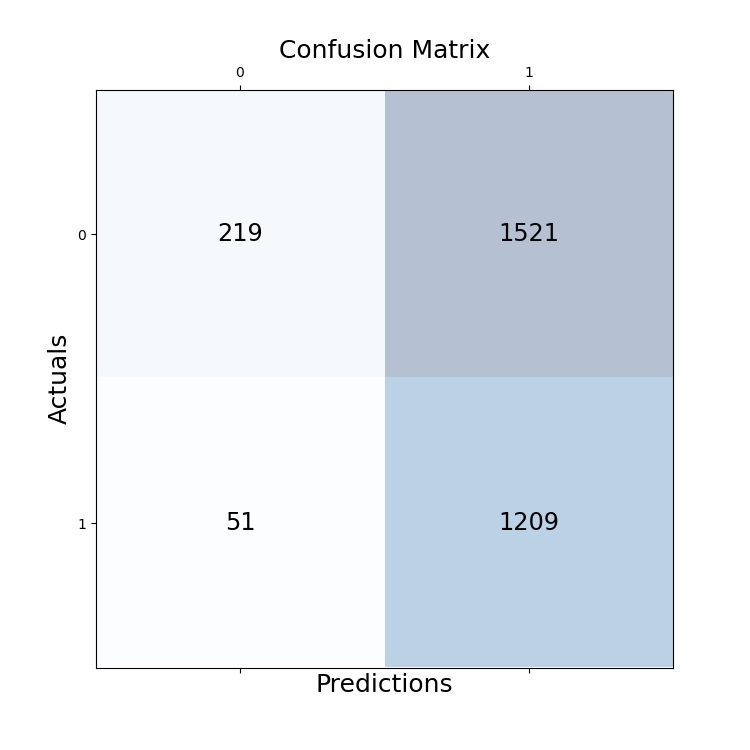

<IPython.core.display.Javascript object>


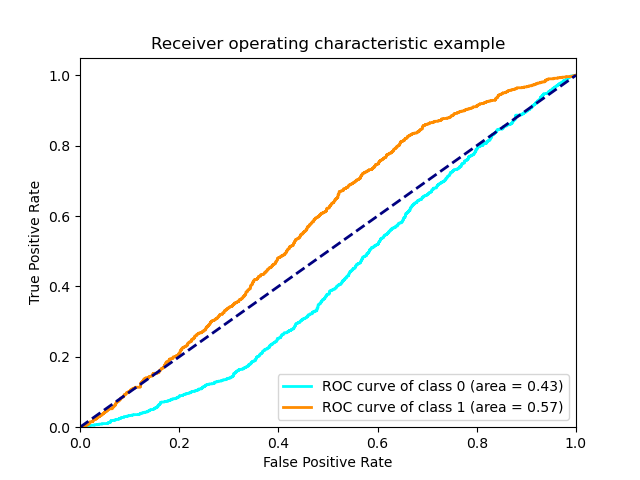

In [3]:
#Hate Score
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=3, max_df=0.75)

x_train_dtm = vect.fit_transform(trainSet.text)
x_test_dtm = vect.transform(testSet.text)

nb = fitting(x_train_dtm, trainSet.HS)
hs_pred, hs_F1 = classify(x_test_dtm, testSet.HS, nb)
Metrics(x_test_dtm, testSet.HS, nb)

Wall time: 1 ms
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2471
           1       0.33      0.96      0.49       529

    accuracy                           0.65      3000
   macro avg       0.66      0.77      0.62      3000
weighted avg       0.87      0.65      0.69      3000




<IPython.core.display.Javascript object>


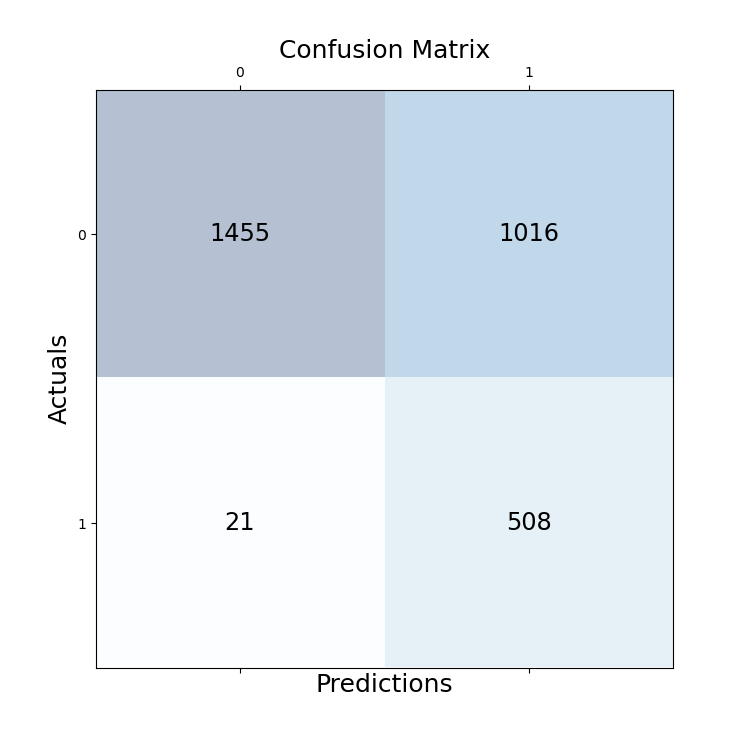

<IPython.core.display.Javascript object>


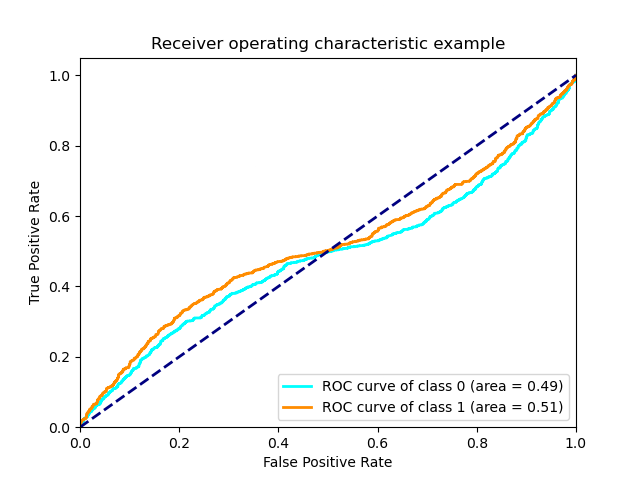

In [4]:
#Target Score
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=4, max_df=0.5)

x_train_dtm = vect.fit_transform(hateSet.text)
#x_train_dtm = vect.fit_transform(trainSet.text)
x_test_dtm = vect.transform(testSet.text)

nb = fitting(x_train_dtm, hateSet.TR)
#nb = fitting(x_train_dtm, trainSet.TR)
classify(x_test_dtm, testSet.TR, nb)
Metrics(x_test_dtm, testSet.HS, nb)

Wall time: 3.01 ms
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2471
           1       0.36      0.94      0.52       529

    accuracy                           0.70      3000
   macro avg       0.67      0.79      0.65      3000
weighted avg       0.87      0.70      0.74      3000




<IPython.core.display.Javascript object>


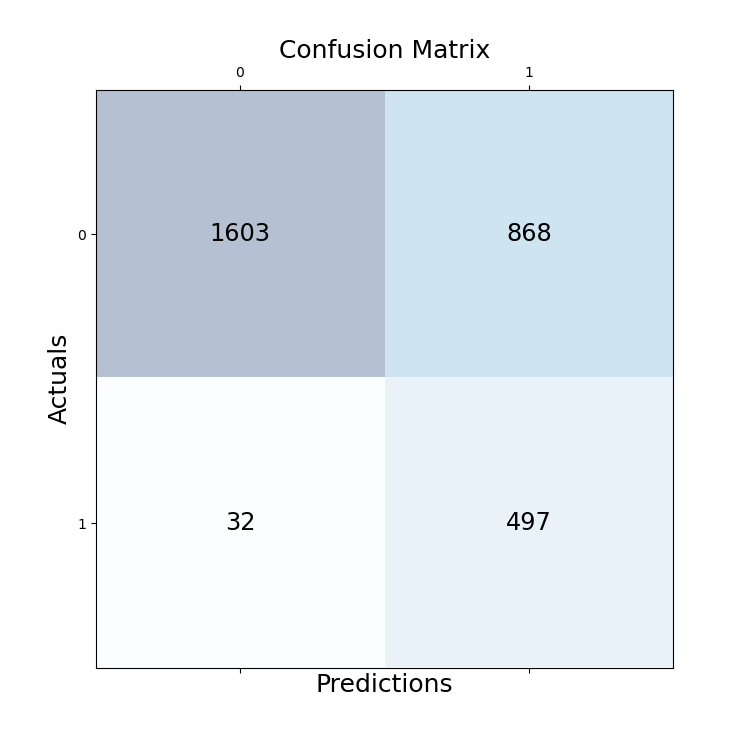

<IPython.core.display.Javascript object>


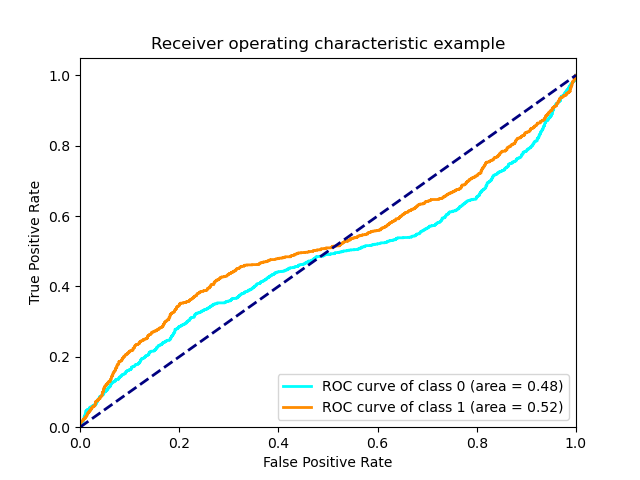

In [5]:
#Target Score - No Filter
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=4, max_df=0.5)

#x_train_dtm = vect.fit_transform(hateSet.text)
x_train_dtm = vect.fit_transform(trainSet.text)
x_test_dtm = vect.transform(testSet.text)

#nb = fitting(x_train_dtm, hateSet.TR)
nb = fitting(x_train_dtm, trainSet.TR)
tr_pred, tr_F1 = classify(x_test_dtm, testSet.TR, nb)
Metrics(x_test_dtm, testSet.HS, nb)

Wall time: 2 ms
              precision    recall  f1-score   support

           0       0.85      0.65      0.74      2406
           1       0.27      0.53      0.36       594

    accuracy                           0.63      3000
   macro avg       0.56      0.59      0.55      3000
weighted avg       0.73      0.63      0.66      3000




<IPython.core.display.Javascript object>


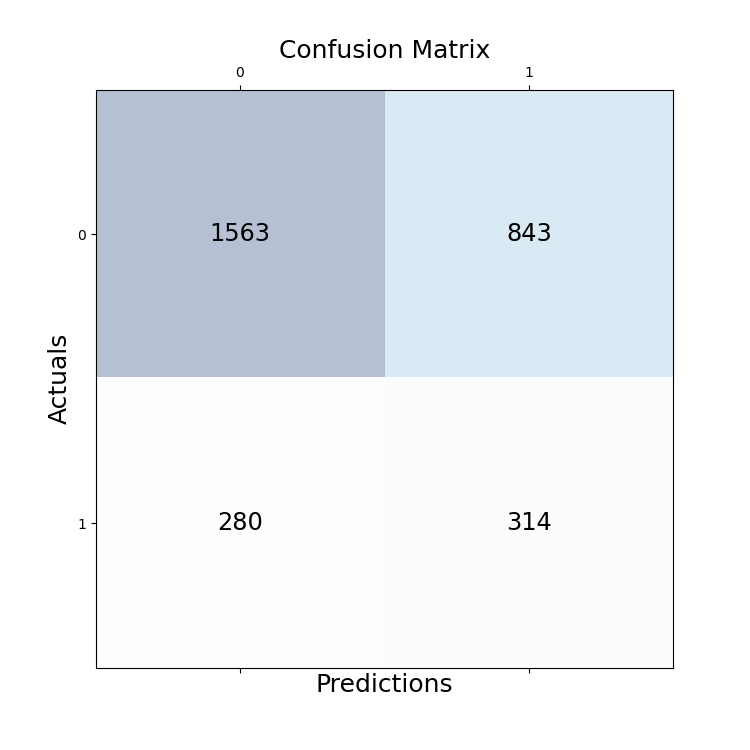

<IPython.core.display.Javascript object>


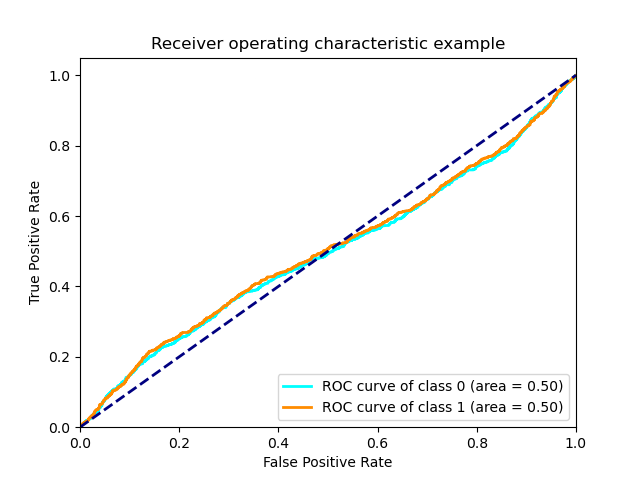

In [6]:
#Aggressive Score
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=4, max_df=0.75)

x_train_dtm = vect.fit_transform(hateSet.text)
#x_train_dtm = vect.fit_transform(trainSet.text)
x_test_dtm = vect.transform(testSet.text)

nb = fitting(x_train_dtm, hateSet.AG)
#nb = fitting(x_train_dtm, trainSet.AG)
classify(x_test_dtm, testSet.AG, nb)
Metrics(x_test_dtm, testSet.HS, nb)

Wall time: 2 ms
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      2406
           1       0.27      0.50      0.35       594

    accuracy                           0.64      3000
   macro avg       0.56      0.59      0.55      3000
weighted avg       0.73      0.64      0.67      3000




<IPython.core.display.Javascript object>


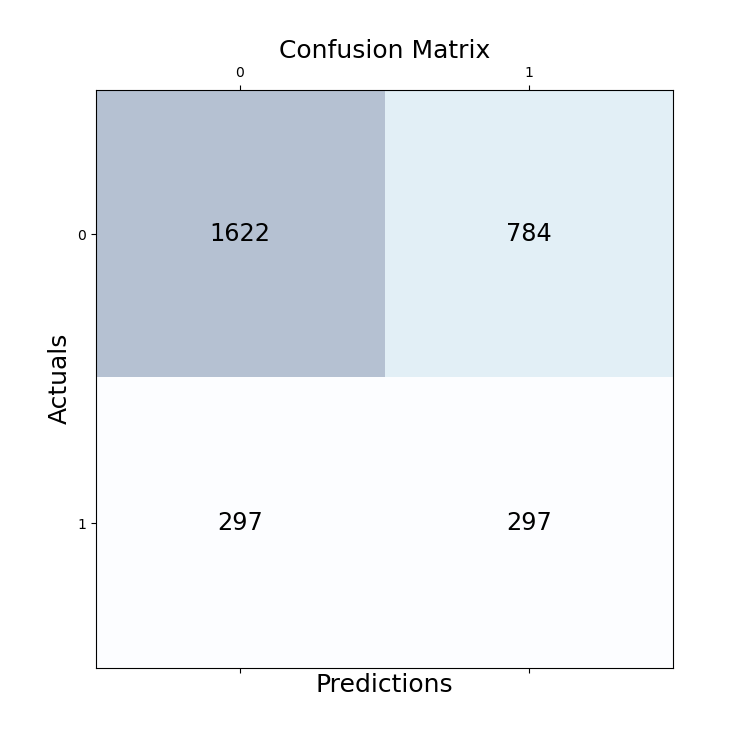

<IPython.core.display.Javascript object>


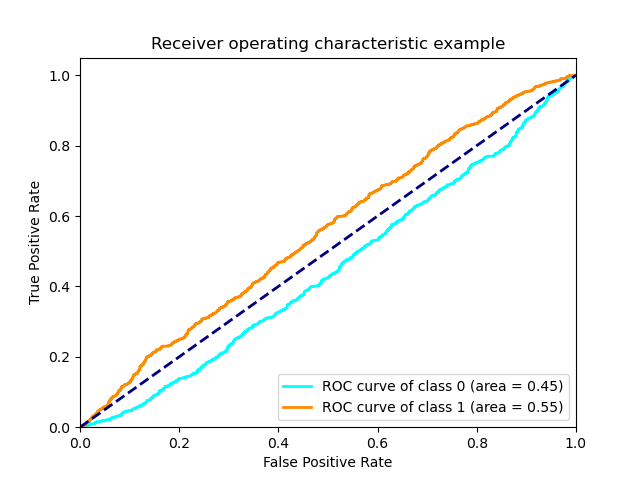

In [7]:
#Aggressive Score
vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=4, max_df=0.75)

#x_train_dtm = vect.fit_transform(hateSet.text)
x_train_dtm = vect.fit_transform(trainSet.text)
x_test_dtm = vect.transform(testSet.text)

#nb = fitting(x_train_dtm, hateSet.AG)
nb = fitting(x_train_dtm, trainSet.AG)
ag_pred, ag_F1 = classify(x_test_dtm, testSet.AG, nb)
Metrics(x_test_dtm, testSet.HS, nb)

trainSet

0.5248152059134108

0.3546268656716418

hateSet

0.4948855333658061

0.3586521987435751

In [8]:
y_true = np.empty((0,3), int)
y_pred = np.empty((0,3), int)
for i in range(2999):
    y_true = np.append(y_true, [[testSet.HS[i], testSet.TR[i], testSet.HS[i]]], axis = 0)
    y_pred = np.append(y_pred, [[hs_pred[i], tr_pred[i], ag_pred[i]]], axis = 0)

#Overall F1-Score
overall_F1 = (hs_F1 + tr_F1 + ag_F1) / 3
#Exact Match Ratio
EMR = np.all((y_pred == y_true), axis=1).mean()

print("Overall F1 Score: %f" % overall_F1)
print("Exact Match Ratio: %f" % EMR)

Overall F1 Score: 0.495152
Exact Match Ratio: 0.202067
